# 2.1 Supervised learning: predicting an output variable from high-dimensional observations

[Link to tutorial page](https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html)

Supervised learning consists in learning the link between 2 datasets: 
- The observed or known data, x
- The external variable or unknown data,  y which we are trying to predict

All supervised estimators in scikit-learn implement a fit(X, y) method to fit the model and a predict(X) method that, given unlabeled observations X, returns the predicted labels y.

### Classifying Irises

The iris dataset is a **classification task** consisting in identifying 3 different types of irises (Setosa, Versicolour, and Virginica) from their petal and sepal length and width

In [306]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D                 # matplotlib toolkits
from sklearn.decomposition import PCA                   # Principal component analysis (PCA)
from sklearn import neighbors, linear_model, datasets 
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [44]:
# Load the iris dataset
iris = datasets.load_iris()

### Plotting the data

Link to [example](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

In [45]:
# iris data - array conisting of sepal length, sepal width, pedal length, pedal width (cm) 
x = iris.data
# using only the first 2 features of the data - sepal length & sepal width
X = x[:, :2]
# iris target - classification of irises, setosa (0), versicolor (1), virgnica (2) 
y = iris.target

In [46]:
# for extending the grid values in the plot
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
x_min, x_max, y_min, y_max

(3.8, 8.4, 1.5, 4.9)

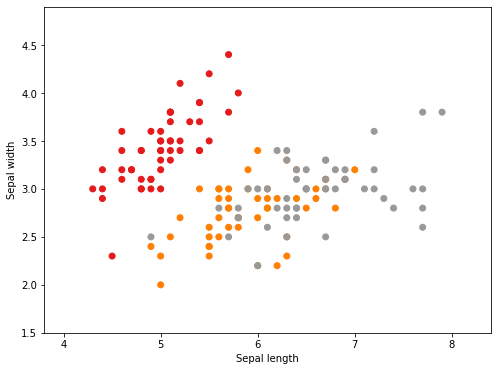

In [47]:
# set plot figure size
plt.figure(figsize=(8, 6))

# scatter plot - sepal length vs sepal width, set the classification.
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

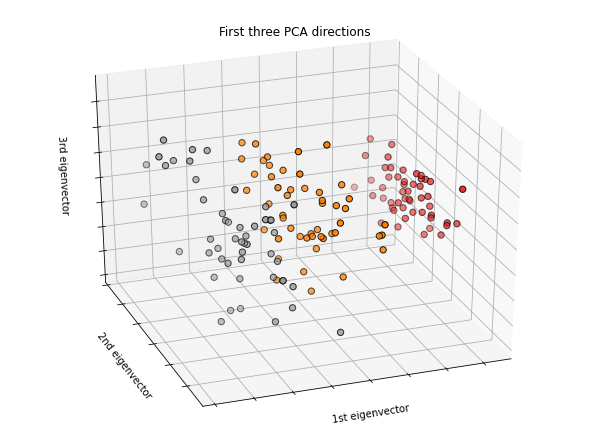

In [48]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

# Principal component analysis (PCA)
X_reduced = PCA(n_components=3).fit_transform(iris.data)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

# KNN (k nearest neighbors) classification example
### Iris Dataset

The simplest possible classifier is the nearest neighbor: given a new observation X_test, find in the training set (i.e. the data used to train the estimator) the observation with the closest feature vector.

In [49]:
iris_X, iris_y = x, y

In [50]:
# Split the iris data into training & test data
# use a random permutation, to split the data randomly
np.random.seed(0)
# generate random permutation of values over the full length of the 150 samples
indices =np.random.permutation(len(iris_X))
indices

array([114,  62,  33, 107,   7, 100,  40,  86,  76,  71, 134,  51,  73,
        54,  63,  37,  78,  90,  45,  16, 121,  66,  24,   8, 126,  22,
        44,  97,  93,  26, 137,  84,  27, 127, 132,  59,  18,  83,  61,
        92, 112,   2, 141,  43,  10,  60, 116, 144, 119, 108,  69, 135,
        56,  80, 123, 133, 106, 146,  50, 147,  85,  30, 101,  94,  64,
        89,  91, 125,  48,  13, 111,  95,  20,  15,  52,   3, 149,  98,
         6,  68, 109,  96,  12, 102, 120, 104, 128,  46,  11, 110, 124,
        41, 148,   1, 113, 139,  42,   4, 129,  17,  38,   5,  53, 143,
       105,   0,  34,  28,  55,  75,  35,  23,  74,  31, 118,  57, 131,
        65,  32, 138,  14, 122,  19,  29, 130,  49, 136,  99,  82,  79,
       115, 145,  72,  77,  25,  81, 140, 142,  39,  58,  88,  70,  87,
        36,  21,   9, 103,  67, 117,  47])

In [51]:
# training data
# using 90% of the data for training - 140 samples
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]

len(iris_X_train)

140

In [52]:
# testing data
# using the remaining 10% of the data for test - 10 samples
iris_X_test= iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]

len(iris_y_test)

10

In [53]:
# Create & fit a nearest-neighbor classifier
knn =KNeighborsClassifier()
# KNN train
knn.fit(iris_X_train, iris_y_train)
# predict classification of the test data
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [54]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

## Plotting Nearest Neighbors Classifcation
### Iris dataset

Link to [example](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html)

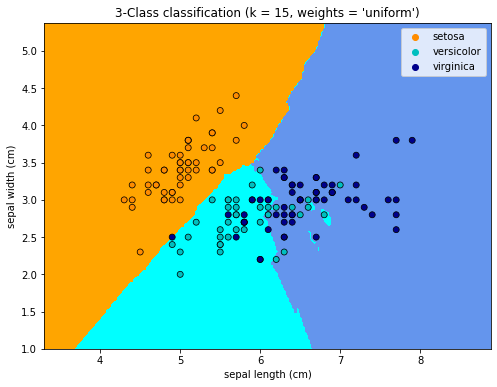

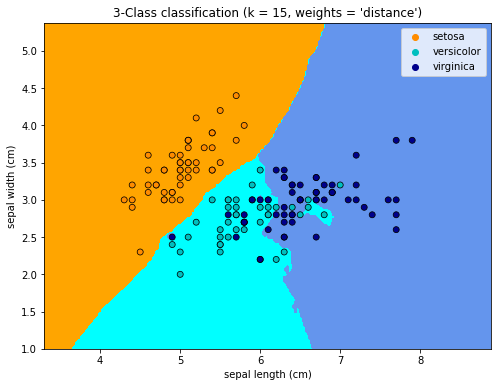

In [55]:
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()

# Linear model - from regression to sparsity

## Linear Regression

### Diabetes Dataset

The diabetes dataset consists of 10 physiological variables (age, sex, weight, blood pressure) measure on 442 patients, and an indication of disease progression after one year:

In [353]:
# load the diabetes dataset
diabetes = datasets.load_diabetes()
#print(diabetes)

In [354]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
#diabetes_X = diabetes_X[:, np.newaxis, 2]

# set the training data - 80% of the data
diabetes_X_train = diabetes_X[:-20]
diabetes_y_train = diabetes_y[:-20]

# set the testing data - 20% of the data
diabetes_X_test  = diabetes_X[-20:]
diabetes_y_test  = diabetes_y[-20:]

In [355]:
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [356]:
diabetes_y_pred = regr.predict(diabetes_X_test)
print(regr.coef_)

[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]


In [357]:
np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2)

2004.5676026898232

In [358]:
regr.score(diabetes_X_test, diabetes_y_test)

0.5850753022690569

The example below uses only the first feature of the diabetes dataset, in order to illustrate the data points within the two-dimensional plot.

Link to [Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


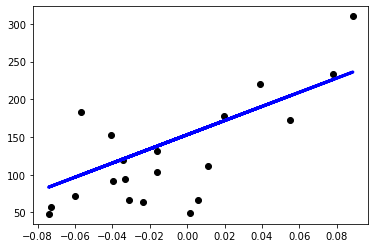

In [360]:
# Load the diabetes dataset
dia_X, dia_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
dia_X = dia_X[:, np.newaxis, 2]

# Split the data into training/testing sets
dia_X_train = dia_X[:-20]
dia_X_test = dia_X[-20:]

# Split the targets into training/testing sets
dia_y_train = dia_y[:-20]
dia_y_test = dia_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(dia_X_train, dia_y_train)

# Make predictions using the testing set
dia_y_pred = regr.predict(dia_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(dia_y_test, dia_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(dia_y_test, dia_y_pred))

# Plot outputs
plt.scatter(dia_X_test, dia_y_test,  color='black')
plt.plot(dia_X_test, dia_y_pred, color='blue', linewidth=3)

plt.show()

## Shrinkage¶

If there are few data points per dimension, noise in the observations induces high variance:

In [361]:
X = np.c_[ .5, 1].T
y = [0.5, 1]
test =np.c_[0, 2].T
print("x-values = ", X)
print("y-values = ", y)
print("test-values = ", test)

x-values =  [[0.5]
 [1. ]]
y-values =  [0.5, 1]
test-values =  [[0]
 [2]]


In [362]:
regr = linear_model.LinearRegression()

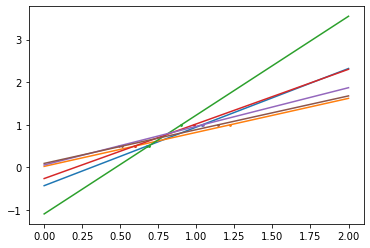

In [363]:
np.random.seed(0)
for _ in range(6):
    this_X = 0.1 * np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=3)

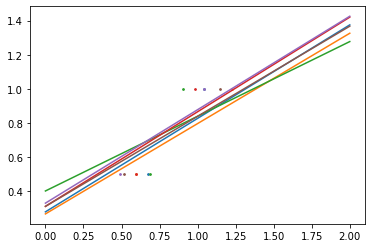

In [364]:
regr = linear_model.Ridge(alpha=.1)

plt.figure()

np.random.seed(0)
for _ in range(6):
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=3)

In [365]:
alphas = np.logspace(-4, -1, 6)
print([regr.set_params(alpha=alpha)
           .fit(diabetes_X_train, diabetes_y_train)
           .score(diabetes_X_test, diabetes_y_test)
       for alpha in alphas])

[0.5851110683883535, 0.5852073015444677, 0.5854677540698493, 0.5855512036503916, 0.5830717085554163, 0.5705899943728012]


## Sparsity

### Lasso (least absolute shrinkage and selection operator)

In [366]:
regr = linear_model.Lasso()
scores = [regr.set_params(alpha=alpha)
              .fit(diabetes_X_train, diabetes_y_train)
              .score(diabetes_X_test, diabetes_y_test)
          for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]
regr.alpha = best_alpha
regr.fit(diabetes_X_train, diabetes_y_train)

print(regr.coef_)

[   0.         -212.43764548  517.19478111  313.77959962 -160.8303982
   -0.         -187.19554705   69.38229038  508.66011217   71.84239008]


## LogisticRegression
### Iris Dataset

In [375]:
log = linear_model.LogisticRegression(C=1e5)
log.fit(iris_X_train, iris_y_train)

iris_y_predict = log.predict(iris_X_test)

print(log.coef_)

[[  3.76012472   8.52827007 -11.93596623  -5.60147641]
 [ -0.11085256  -2.42131089   1.5150681   -5.42897164]
 [ -3.64927216  -6.10695918  10.42089813  11.03044805]]


In [376]:
print("Iris Test Classifications = ", iris_y_test)
print("Iris Predicted Classifications = ", iris_y_predict)

Iris Test Classifications =  [1 1 1 0 0 0 2 1 2 0]
Iris Predicted Classifications =  [1 2 1 0 0 0 2 1 2 0]


## LogisticRegression
### Digits Dataset

In [381]:
X_digits, y_digits = datasets.load_digits(return_X_y=True)
X_digits = X_digits / X_digits.max()

n_samples = len(X_digits)

X_train = X_digits[:int(.9 * n_samples)]
y_train = y_digits[:int(.9 * n_samples)]
X_test = X_digits[int(.9 * n_samples):]
y_test = y_digits[int(.9 * n_samples):]

knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression(max_iter=1000)

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.961111
LogisticRegression score: 0.933333


## Support vector machines (SVMs)

SVMs can be used in regression –SVR (Support Vector Regression)–, or in classification –SVC (Support Vector Classification).

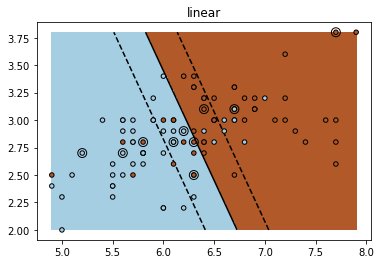

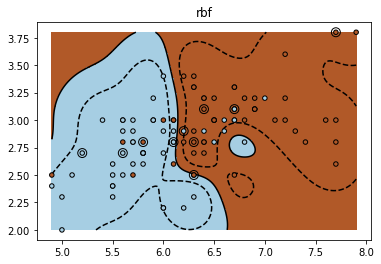

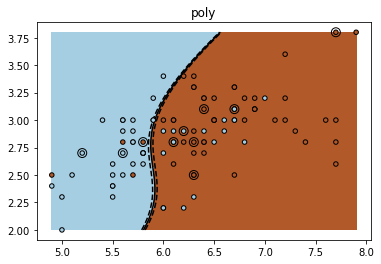

In [382]:
from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

# fit the model
for kernel in ('linear', 'rbf', 'poly'):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()
